### Getting Started

In [1]:
import cv2
import numpy as np
import pandas as pd
import json
import os


class Label:
    def __init__(self, name, id, csId, csTrainId, level4id, level3Id, category, level2Id, level1Id, hasInstances, ignoreInEval, color):
        self.name = name
        self.id = id
        self.csId = csId
        self.csTrainId = csTrainId
        self.level4id = level4id
        self.level3Id = level3Id
        self.category = category
        self.level2Id = level2Id
        self.level1Id = level1Id
        self.hasInstances = hasInstances
        self.ignoreInEval = ignoreInEval
        self.color = color

labels_details = [
    #       name                     id    csId     csTrainId level4id        level3Id  category           level2Id      level1Id  hasInstances   ignoreInEval   color
    Label(  'road'                 ,  0   ,  7 ,     0 ,       0   ,     0  ,   'drivable'            , 0           , 0      , False        , False        , (128, 64,128)  ),
    Label(  'parking'              ,  1   ,  9 ,   255 ,       1   ,     1  ,   'drivable'            , 1           , 0      , False        , False         , (250,170,160)  ),
    Label(  'drivable fallback'    ,  2   ,  255 ,   255 ,     2   ,       1  ,   'drivable'            , 1           , 0      , False        , False         , ( 81,  0, 81)  ),
    Label(  'sidewalk'             ,  3   ,  8 ,     1 ,       3   ,     2  ,   'non-drivable'        , 2           , 1      , False        , False        , (244, 35,232)  ),
    Label(  'rail track'           ,  4   , 10 ,   255 ,       3   ,     3  ,   'non-drivable'        , 3           , 1      , False        , False         , (230,150,140)  ),
    Label(  'non-drivable fallback',  5   , 255 ,     9 ,      4   ,      3  ,   'non-drivable'        , 3           , 1      , False        , False        , (152,251,152)  ),
    Label(  'person'               ,  6   , 24 ,    11 ,       5   ,     4  ,   'living-thing'        , 4           , 2      , True         , False        , (220, 20, 60)  ),
    Label(  'animal'               ,  7   , 255 ,   255 ,      6   ,      4  ,   'living-thing'        , 4           , 2      , True         , True        , (246, 198, 145)),
    Label(  'rider'                ,  8   , 25 ,    12 ,       7   ,     5  ,   'living-thing'        , 5           , 2      , True         , False        , (255,  0,  0)  ),
    Label(  'motorcycle'           ,  9   , 32 ,    17 ,       8   ,     6  ,   '2-wheeler'           , 6           , 3      , True         , False        , (  0,  0,230)  ),
    Label(  'bicycle'              , 10   , 33 ,    18 ,       9   ,     7  ,   '2-wheeler'           , 6           , 3      , True         , False        , (119, 11, 32)  ),
    Label(  'autorickshaw'         , 11   , 255 ,   255 ,     10   ,      8  ,   'autorickshaw'        , 7           , 3      , True         , False        , (255, 204, 54) ),
    Label(  'car'                  , 12   , 26 ,    13 ,      11   ,     9  ,   'car'                 , 7           , 3      , True         , False        , (  0,  0,142)  ),
    Label(  'truck'                , 13   , 27 ,    14 ,      12   ,     10 ,   'large-vehicle'       , 8           , 3      , True         , False        , (  0,  0, 70)  ),
    Label(  'bus'                  , 14   , 28 ,    15 ,      13   ,     11 ,   'large-vehicle'       , 8           , 3      , True         , False        , (  0, 60,100)  ),
    Label(  'caravan'              , 15   , 29 ,   255 ,      14   ,     12 ,   'large-vehicle'       , 8           , 3      , True         , True         , (  0,  0, 90)  ),
    Label(  'trailer'              , 16   , 30 ,   255 ,      15   ,     12 ,   'large-vehicle'       , 8           , 3      , True         , True         , (  0,  0,110)  ),
    Label(  'train'                , 17   , 31 ,    16 ,      15   ,     12 ,   'large-vehicle'       , 8           , 3      , True         , True        , (  0, 80,100)  ),
    Label(  'vehicle fallback'     , 18   , 355 ,   255 ,     15   ,      12 ,   'large-vehicle'       , 8           , 3      , True         , False        , (136, 143, 153)),
    Label(  'curb'                 , 19   ,255 ,   255 ,      16   ,     13 ,   'barrier'             , 9           , 4      , False        , False        , (220, 190, 40)),
    Label(  'wall'                 , 20   , 12 ,     3 ,      17   ,     14 ,   'barrier'             , 9           , 4      , False        , False        , (102,102,156)  ),
    Label(  'fence'                , 21   , 13 ,     4 ,      18   ,     15 ,   'barrier'             , 10           , 4      , False        , False        , (190,153,153)  ),
    Label(  'guard rail'           , 22   , 14 ,   255 ,      19   ,     16 ,   'barrier'             , 10          , 4      , False        , False         , (180,165,180)  ),
    Label(  'billboard'            , 23   , 255 ,   255 ,     20   ,      17 ,   'structures'          , 11           , 4      , False        , False        , (174, 64, 67) ),
    Label(  'traffic sign'         , 24   , 20 ,     7 ,      21   ,     18 ,   'structures'          , 11          , 4      , False        , False        , (220,220,  0)  ),
    Label(  'traffic light'        , 25   , 19 ,     6 ,      22   ,     19 ,   'structures'          , 11          , 4      , False        , False        , (250,170, 30)  ),
    Label(  'pole'                 , 26   , 17 ,     5 ,      23   ,     20 ,   'structures'          , 12          , 4      , False        , False        , (153,153,153)  ),
    Label(  'polegroup'            , 27   , 18 ,   255 ,      23   ,     20 ,   'structures'          , 12          , 4      , False        , False         , (153,153,153)  ),
    Label(  'obs-str-bar-fallback' , 28   , 255 ,   255 ,     24   ,      21 ,   'structures'          , 12          , 4      , False        , False        , (169, 187, 214) ),
    Label(  'building'             , 29   , 11 ,     2 ,      25   ,     22 ,   'construction'        , 13          , 5      , False        , False        , ( 70, 70, 70)  ),
    Label(  'bridge'               , 30   , 15 ,   255 ,      26   ,     23 ,   'construction'        , 13          , 5      , False        , False         , (150,100,100)  ),
    Label(  'tunnel'               , 31   , 16 ,   255 ,      26   ,     23 ,   'construction'        , 13          , 5      , False        , False         , (150,120, 90)  ),
    Label(  'vegetation'           , 32   , 21 ,     8 ,      27   ,     24 ,   'vegetation'          , 14          , 5      , False        , False        , (107,142, 35)  ),
    Label(  'sky'                  , 33   , 23 ,    10 ,      28   ,     25 ,   'sky'                 , 15          , 6      , False        , False        , ( 70,130,180)  ),
    Label(  'fallback background'  , 34   , 255 ,   255 ,     29   ,      25 ,   'object fallback'     , 15          , 6      , False        , False        , (169, 187, 214)),
    Label(  'unlabeled'            , 35   ,  0  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'ego vehicle'          , 36   ,  1  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'rectification border' , 37   ,  2  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'out of roi'           , 38   ,  3  ,     255 ,   255   ,      255 ,   'void'                , 255         , 255    , False        , True         , (  0,  0,  0)  ),
    Label(  'license plate'        , 39   , 255 ,     255 ,   255   ,      255 ,   'vehicle'             , 255         , 255    , False        , True         , (  0,  0,142)  ),

]



# Function to get label information from pixel color
def get_label_by_color(color):
    for label in labels_details:
        if label.color == tuple(color):  # Compare the pixel color to the label color
            return label
    return None

import torch
import numpy as np

# Step 1: Build a dictionary to map color tuples to label IDs
color_to_id_map = {tuple(label.color): label.id for label in labels_details}
id_to_label_map = {int(label.id): label.name for label in labels_details}
def id_to_label_map():
    new_dict = {}
    for label in labels_details:
        new_dict[int(label.id)] = label.name
    return new_dict

First, I ananlyse the dataset given to identify the no of classes, their occurrences and identify the less and more occurring classes

In [ ]:
import os
import json

labels = [label.name for label in labels_details]
labels.append('ground')
label_dict = {}
label_dict = label_dict.fromkeys(labels, 0)
# label_dict['ground'] = 0
base_dir = 'iiith-driving-dataset/dataset/dataset/labels' 
for sub_dir in os.listdir(base_dir):
    sub_dir_path = os.path.join(base_dir, sub_dir)

    for json_file in os.listdir(sub_dir_path):
        if json_file.endswith('_polygons.json'):
            json_path = os.path.join(sub_dir_path, json_file)
            with open(json_path, 'r') as f:
                data = json.load(f)
                unique_label = set()
                for obj in data.get('objects', []):
                    unique_label.add(obj.get('label'))
                for s in unique_label:
                    label_dict[s] += 1

In [8]:
import operator
sorted_label_dict = dict(sorted(label_dict.items(),key = operator.itemgetter(1)))
sorted_label_dict

{'license plate': 1,
 'unlabeled': 2,
 'ego vehicle': 2,
 'ground': 3,
 'tunnel': 5,
 'trailer': 10,
 'train': 12,
 'rectification border': 12,
 'rail track': 13,
 'parking': 27,
 'caravan': 97,
 'out of roi': 185,
 'traffic light': 316,
 'animal': 574,
 'polegroup': 685,
 'bicycle': 695,
 'bridge': 761,
 'guard rail': 1072,
 'fallback background': 1238,
 'sidewalk': 1409,
 'bus': 1782,
 'fence': 1865,
 'traffic sign': 2754,
 'truck': 3619,
 'wall': 4059,
 'autorickshaw': 4101,
 'curb': 4186,
 'non-drivable fallback': 4355,
 'vehicle fallback': 4686,
 'person': 4763,
 'billboard': 4954,
 'rider': 5439,
 'car': 5505,
 'motorcycle': 5658,
 'building': 5902,
 'drivable fallback': 6344,
 'road': 6830,
 'pole': 6861,
 'vegetation': 6986,
 'obs-str-bar-fallback': 6992,
 'sky': 7000}

Defining a threshold for lower freq labels which we will try to treat separately

In [12]:
lower_freq_labels = []
for i in sorted_label_dict:
    if sorted_label_dict[i] < 100 and sorted_label_dict[i] > 4:
        lower_freq_labels.append(i)

In [ ]:
import os
import json

def extract_label_images(base_dir, class_name):
    label_ids = []
    
    # Go through each sub-directory in the 'labels' folder
    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
            
        # Iterate through each file in the sub-directory
        for json_file in os.listdir(sub_dir_path):
            if json_file.endswith('_polygons.json'):
                json_path = os.path.join(sub_dir_path, json_file)

                # Load the JSON file
                with open(json_path, 'r') as f:
                    data = json.load(f)
                    for obj in data.get('objects', []):
                        if obj.get('label') == class_name:
                            # Extract the unique image ID from the file name (e.g., 'frame0029')
                            image_id = json_file.split('_')[0].replace('frame', '')
                            image_id = sub_dir + "_" + image_id
                            label_ids.append(image_id)
                            break
    
    return label_ids


# Example usage
base_dir = 'iiith-driving-dataset/dataset/dataset/labels' 


In [16]:
lower_freq_labels

['tunnel',
 'trailer',
 'train',
 'rectification border',
 'rail track',
 'parking',
 'caravan']

In [17]:
lfreq_label_dict = {}
lfreq_label_dict = lfreq_label_dict.fromkeys(lower_freq_labels, [])
for label in lfreq_label_dict:
    ls = extract_label_images(base_dir, label)
    lfreq_label_dict[label] = ls

In [18]:
for k, v in lfreq_label_dict.items():
    print(k, " ", len(v))

tunnel   5
trailer   10
train   12
rectification border   12
rail track   13
parking   27
caravan   97


In [ ]:
import os
import shutil

def organize_images_by_class(class_labels, image_dir, output_dir):
    """Organizes images into subdirectories based on class labels and image IDs.

    Args:
        class_labels (dict): A dictionary where keys are class labels and values are lists of image IDs.
        image_dir (str): The directory containing the original images.
        output_dir (str): The root directory where class subdirectories will be created.
    """


    for class_label, image_ids in class_labels.items():
        class_subdir = os.path.join(output_dir, str(class_label))  # Creating subdir name

        # Create subdirectory if it doesn't exist
        os.makedirs(class_subdir, exist_ok=True)

        for image_id_string in image_ids:
            subdir, image_id = image_id_string.split("_")

            try:
                image_name = f"frame{image_id}_leftImg8bit.jpg"
                source_image_path = os.path.join(image_dir, subdir, image_name)
                shutil.copy(source_image_path, os.path.join(class_subdir, image_name))
                print(f"Copied '{image_name}' to '{class_label}' subdirectory.")


            except FileNotFoundError:
                try:
                    image_name = f"{image_id}_leftImg8bit.jpg"
                    source_image_path = os.path.join(image_dir, subdir, image_name)
                    shutil.copy(source_image_path, os.path.join(class_subdir, image_name))
                    print(f"Copied '{image_name}' to '{class_label}' subdirectory.")

                except FileNotFoundError:
                    print(f"WARNING: Neither file pattern found for {image_id_string}")


# Example usage (replace with your actual data)
class_labels = lfreq_label_dict

image_dir = r"iiith-driving-dataset/dataset/dataset/train"
output_dir = r"images"


organize_images_by_class(class_labels, image_dir, output_dir)

## Selecting Key Images for Fine-Tuning on the basis of their Subdirectories:

The selection process begins by analyzing each directory to extract key features like the total number of unique images, the occurrence of rare classes, and the overall image count. For each directory:

**Unique Image Count:** We first compute the total number of distinct images, ensuring no duplicates are considered.
**Rare Class Representation:** We identify the rare classes present in the images. A rare class is defined based on its infrequent occurrence across the dataset. For each image, we parse the corresponding JSON files to extract class labels and flag those that belong to the underrepresented categories.
**Total Image Count:** We then calculate the total number of images in each directory.
Next, we assign weights to each of these metrics to capture their importance in the final selection:

***α (Weight for unique images):*** This factor gives importance to directories containing a higher diversity of images.
***β (Weight for rare class representation):*** This factor emphasizes directories that contribute rare class instances.
***γ (Weight for image count):*** This accounts for the overall size of the directory in terms of the number of images.
After normalizing these weighted values (so each metric contributes comparably), a composite score is calculated for each directory. The formula used to compute the final score for each directory 
𝐷 is:

Score
𝐷 = 
𝛼
⋅
norm
(
unique images
)
+
𝛽
⋅
norm
(
rare classes
)
+
𝛾
⋅
norm
(
total images
)
Finally, directories are ranked based on their scores, and the top 
N directories with the highest scores are selected for fine-tuning the model. This ensures the sampled subset has a richer class representation and a balanced distribution of rare and frequent classes. 

In [ ]:
import os
import json

# Define rare classes
rare_classes = ['tunnel','trailer', 'train', 'rectification border', 'rail track', 'parking']

# Store the scores for each subdirectory
subdir_scores = {}
base_path = 'iiith-driving-dataset/dataset/dataset/labels'
# Iterate over all subdirectories (e.g., 201, 202...)
for subdir in os.listdir(base_path):
    class_count = {}
    rare_class_count = 0
    image_count = 0

    # Get all JSON files (assuming the format is like frame{id}_polygons.json)
    json_files = [f for f in os.listdir(os.path.join(base_path, subdir)) if f.endswith('_polygons.json')]

    for json_file in json_files:
        image_count += 1  # Increment image count
        with open(os.path.join(os.path.join(base_path, subdir), json_file), 'r') as file:
            data = json.load(file)
            for obj in data['objects']:
                label = obj['label']
                # Count class occurrences
                if label in class_count:
                    class_count[label] += 1
                else:
                    class_count[label] = 1

                # Count rare class occurrences
                if label in rare_classes:
                    rare_class_count += 1

    # Calculate the class diversity score
    class_diversity_score = len(class_count)  # Number of unique classes

    # Store the subdirectory scores
    subdir_scores[subdir] = {
        'class_diversity_score': class_diversity_score,
        'rare_class_score': rare_class_count,
        'image_count': image_count
    }

# Normalize the scores and calculate the weighted score
max_class_diversity = max([v['class_diversity_score'] for v in subdir_scores.values()])
max_rare_class = max([v['rare_class_score'] for v in subdir_scores.values()])
max_image_count = max([v['image_count'] for v in subdir_scores.values()])

α, β, γ = 0.4, 0.45, 0.15  # Example weights

for subdir, scores in subdir_scores.items():
    weighted_score = (
        α * (scores['class_diversity_score'] / max_class_diversity) +
        β * (scores['rare_class_score'] / max_rare_class) +
        γ * (scores['image_count'] / max_image_count)
    )
    subdir_scores[subdir]['weighted_score'] = weighted_score

# Sort the subdirectories based on weighted score
ranked_subdirs = sorted(subdir_scores.items(), key=lambda x: x[1]['weighted_score'], reverse=True)

# Select top N subdirectories for dataset creation
# top_subdirs = [subdir for subdir, scores in ranked_subdirs[:N]]  # N is the number of subdirs to sample

In [ ]:
needed_count = 0
for i, (k, v) in enumerate(ranked_subdirs):
    print(k, v['weighted_score'], v['image_count'])
    needed_count += v['image_count']
    print(i+1, " ", needed_count)

In [17]:
N = 9
top_subdirs = [subdir for subdir, scores in ranked_subdirs[:N]]
top_subdirs

['470', '548', '540', '421', '377', '431', '446', '439', '491']

In [8]:
color_to_id = {tuple(label.color) : label.id for label in labels_details}
def convert(seg_map):
    # Convert the segmentation map image to a numpy array of shape (H, W, 3) where each pixel has RGB values
    seg_map_array = np.array(seg_map.convert('RGB').resize((512,512)))

    # Create an empty H * W array to store the pixel-wise label values (id values)
    id_array = np.zeros((seg_map_array.shape[0], seg_map_array.shape[1]), dtype=np.int32)

    # Iterate over each pixel in the segmentation map
    for i in range(seg_map_array.shape[0]):
        for j in range(seg_map_array.shape[1]):
            pixel_color = tuple(seg_map_array[i, j])
            # Lookup the corresponding id for the pixel's color
            id_array[i, j] = color_to_id.get(pixel_color, -1)  # Default to -1 if the color is not found

    return id_array

def get_identifier(filename):
    parts = filename.split('_')
    if 'frame' in parts[0]:
        return parts[0].replace('frame', '')  # Get ID after 'frame'
    else:
        return parts[0]  # Get numeric part in filename

In [ ]:
import PIL.Image as Image
img = Image.open('iiith-driving-dataset/dataset/dataset/labels/201/frame0029_gtFine_labelColors.png')
img = convert(img)

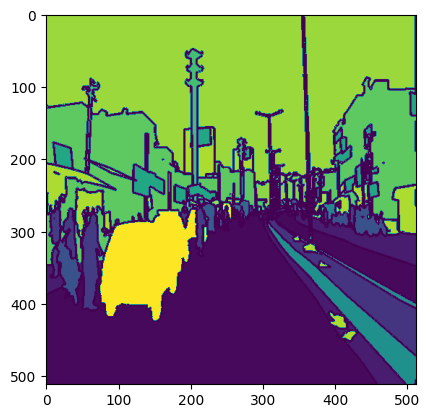

In [12]:
import matplotlib.pyplot as plt
plt.imshow(np.array(img))

## Extracting the dataset from the given dataset for finetuning based on the top subdirs that we got from the ranking based on the custom criteria

In [ ]:
import os
import torch
from PIL import Image
import numpy as np
from tqdm import tqdm
from multiprocessing import Process, Queue
# Base directory path
base_dir = 'iiith-driving-dataset/dataset/dataset'
train_dir = os.path.join(base_dir, 'train')
labels_dir = os.path.join(base_dir, 'labels')
# Array to store the dataset
data_set = []

top_subdirs.insert(0, "296")
# Get the list of subdirectories
subdirs = [dirname for dirname in top_subdirs]

# Process images sequentially
for dirname in tqdm(subdirs, desc="Processing directories"):
    train_subdir = os.path.join(train_dir, dirname)
    labels_subdir = os.path.join(labels_dir, dirname)

    if os.path.isdir(train_subdir) and os.path.isdir(labels_subdir):
        # Get the list of train images and label images
        train_images = [f for f in os.listdir(train_subdir) if f.endswith('.jpg')]
        label_images = [f for f in os.listdir(labels_subdir) if f.endswith('labelColors.png')]

        # Match train and label images based on the {ID}
        for label_image in label_images:
            identifier = get_identifier(label_image)  # Extract {ID} from label filename

            # Find the matching train image
            matched_train_image = next((img for img in train_images if identifier in img), None)

            if matched_train_image:
                # Process the image pair sequentially
                pixel_image_path = os.path.join(train_subdir, matched_train_image)
                label_image_path = os.path.join(labels_subdir, label_image)

                pixel_image = Image.open(pixel_image_path).resize((512,512))  # Train image
                label_image_tensor = convert(Image.open(label_image_path))   # Label image transformed to label IDs

                data_set.append({
                    'pixel_values': pixel_image,  # Train image as PIL Image
                    'label': label_image_tensor  # Label image as torch tensor on GPU (if available)
                })

# Example to show the contents of data_set
for idx, data in enumerate(data_set[:3]):  # Show first 3 entries
    print(f"Index {idx}:")
    print(f"Pixels Image: {data['pixel_values']}")
    # print(f"Labels Image (Tensor on {device}): {data['label']}")  # Labels are stored as tensors on GPU if available


import pickle
# Save the data_set using pickle
save_path = 'data_s.pkl'

with open(save_path, 'wb') as file:
    pickle.dump(data_set, file)

print(f'data_set saved to {save_path}')

Processing directories: 100%|██████████| 10/10 [56:13<00:00, 337.33s/it]


Index 0:
Pixels Image: <PIL.Image.Image image mode=RGB size=512x512 at 0x7E55DF22CFA0>
Index 1:
Pixels Image: <PIL.Image.Image image mode=RGB size=512x512 at 0x7E55DF22C1F0>
Index 2:
Pixels Image: <PIL.Image.Image image mode=RGB size=512x512 at 0x7E55DF22CF10>
data_set saved to /kaggle/working/data_s.pkl


In [ ]:
import pickle

# Loading the dataset for finetuning saved in .pkl format
pkl_file_path = 'data_s.pkl'

# Open and load the .pkl file
with open(pkl_file_path, 'rb') as f:
    data_set = pickle.load(f)


**Now, using HF libraries to convert our dataset in the proper format and also loading the pretrained Mask2Former model**

In [3]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00


In [4]:
!pip install datasets

In [5]:
import json
import torch
import datasets
import requests
import evaluate
import numpy as np
import huggingface_hub
from PIL import Image
import albumentations as A
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from typing import Tuple, Any
from dataclasses import dataclass
from datasets import load_dataset
import matplotlib.patches as mpatches
from huggingface_hub import hf_hub_download
from torch.utils.data import Dataset, DataLoader
from transformers import (
    Mask2FormerImageProcessor,
    AutoImageProcessor,
    Mask2FormerForUniversalSegmentation,
)

torch.manual_seed(42)

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [29]:
from datasets import Dataset
dataset = Dataset.from_dict({"pixel_values": [item["pixel_values"] for item in data_set],
                             "label": [item["label"] for item in data_set]})

In [30]:
dataset = dataset.shuffle(seed=1)
dataset = dataset.train_test_split(test_size=0.2)
train_ds, test_ds = dataset["train"], dataset["test"]

dataset = test_ds.train_test_split(test_size=0.5)
test_ds, val_ds = dataset["train"], dataset["test"]

In [33]:
val_ds

Dataset({
    features: ['pixel_values', 'label'],
    num_rows: 135
})

In [9]:
id2label = id_to_label_map()
print(id2label)

{0: 'road', 1: 'parking', 2: 'drivable fallback', 3: 'sidewalk', 4: 'rail track', 5: 'non-drivable fallback', 6: 'person', 7: 'animal', 8: 'rider', 9: 'motorcycle', 10: 'bicycle', 11: 'autorickshaw', 12: 'car', 13: 'truck', 14: 'bus', 15: 'caravan', 16: 'trailer', 17: 'train', 18: 'vehicle fallback', 19: 'curb', 20: 'wall', 21: 'fence', 22: 'guard rail', 23: 'billboard', 24: 'traffic sign', 25: 'traffic light', 26: 'pole', 27: 'polegroup', 28: 'obs-str-bar-fallback', 29: 'building', 30: 'bridge', 31: 'tunnel', 32: 'vegetation', 33: 'sky', 34: 'fallback background', 35: 'unlabeled', 36: 'ego vehicle', 37: 'rectification border', 38: 'out of roi', 39: 'license plate'}


Now,the dataset contains two fields:`pixel_values` and `label`.

- `pixel_values` is an RGB image of shape (H, W, 3)
- `label` is a segmentation map of shape (H, W) that contains the label of each pixel in the image.


In [13]:
example = train_ds[0]
print(example)
segmentation_map = np.array(example["label"])
image_array = np.array(example["pixel_values"])
print(
    f"Shape : Image: {image_array.shape} - Segmentation map: {segmentation_map.shape}"
)

print(segmentation_map)

{'pixel_values': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x78FA4554DA20>, 'label': [[33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,

_Now, we visualise some samples from the dataset to check if they are stored correctly_


In [34]:
def show_samples(dataset: datasets.Dataset, n: int = 5):
    """
    Displays 'n' samples from the dataset.
    ----
    Args:
      - dataset: The dataset which should contain 'pixel_values' and 'label' in its items.
      - n (int): Number of samples to display.

    """
    if n > len(dataset):
        raise ValueError("n is larger than the dataset size")

    fig, axs = plt.subplots(n, 2, figsize=(10, 5 * n))

    for i in range(n):
        sample = dataset[i]
        image, label = np.array(sample["pixel_values"]), sample["label"]

        axs[i, 0].imshow(image)
        axs[i, 0].set_title("Image")
        axs[i, 0].axis("off")

        axs[i, 1].imshow(image)
        axs[i, 1].imshow(label, cmap="nipy_spectral", alpha=1.0)
        axs[i, 1].set_title("Segmentation Map")
        axs[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

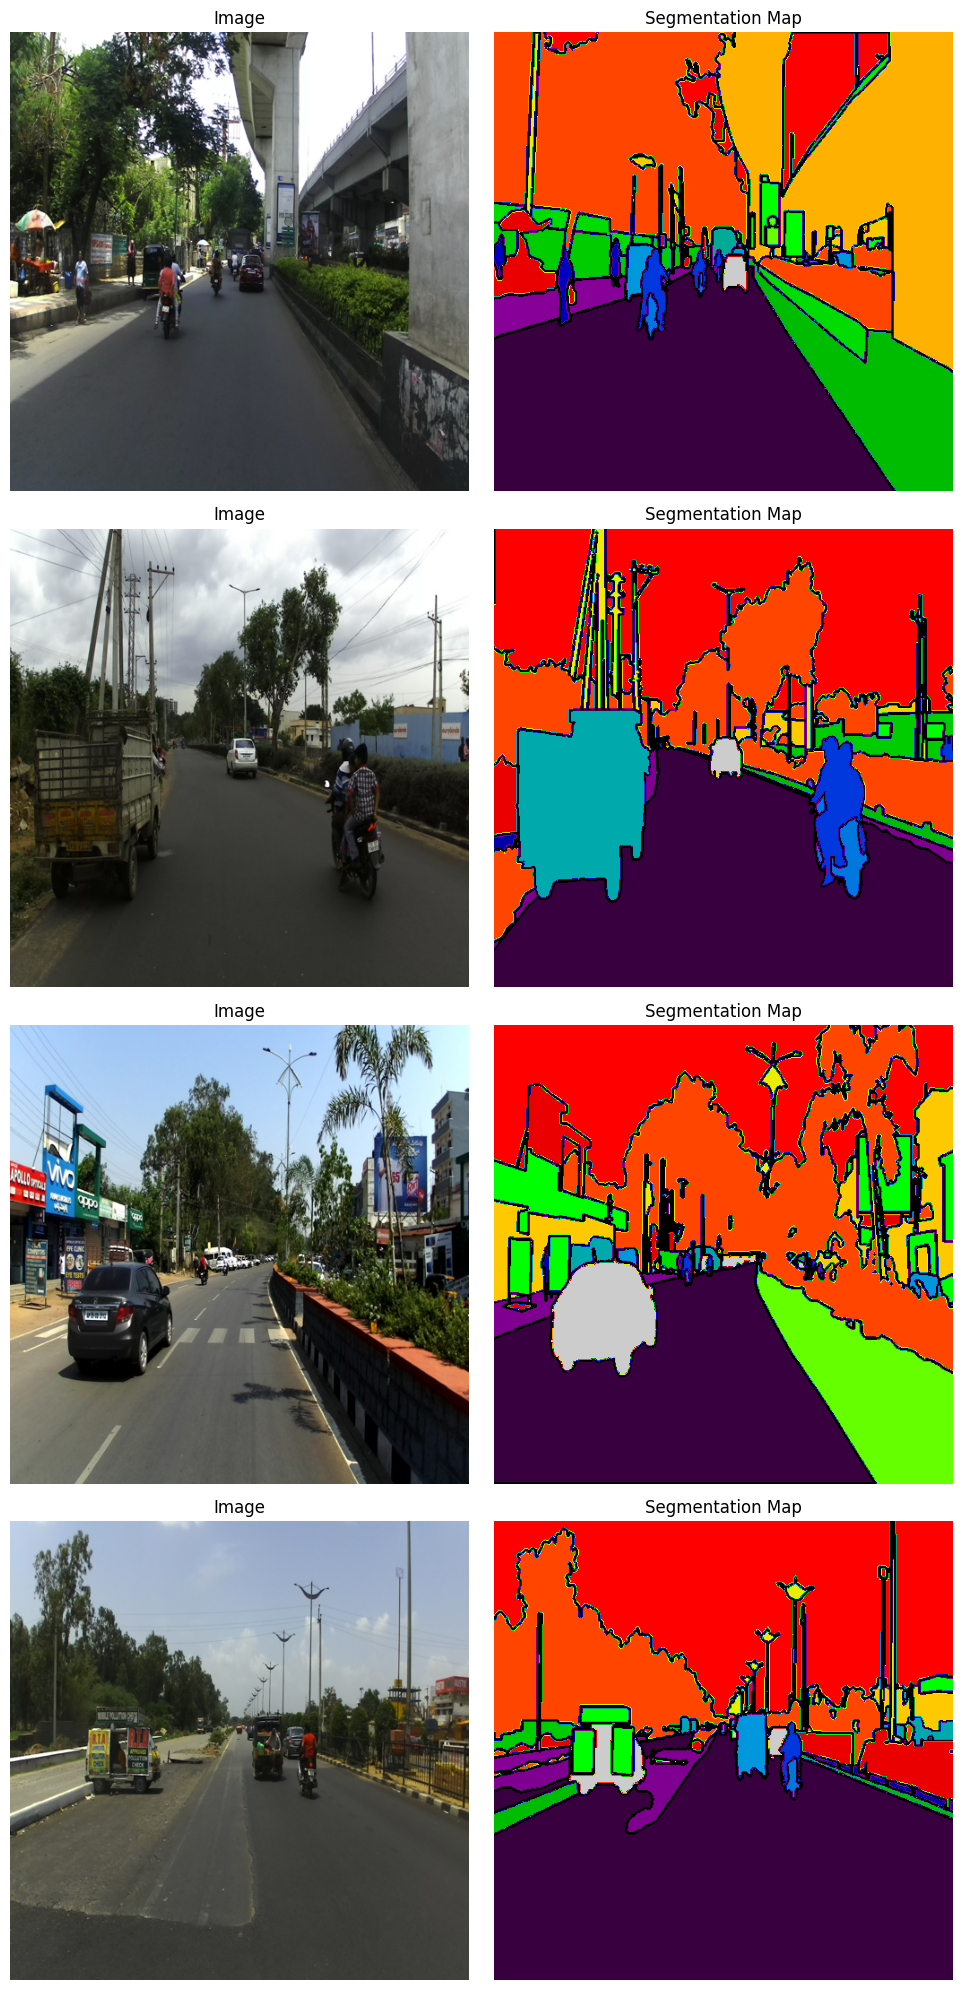

In [35]:
show_samples(train_ds, n=4)

# Preparing the Dataset for training

Here, we use the Mask2Former Image Preprocessor to transform the images in the corresponding format expected by the model

To improve the robustness of the model under different rotations, scaling, or lighting conditions, we apply data augmentations (namely **random croping**, **flipping** and **normalizing**) to the training dataset

We also do normalisation of the images using the mean and std_deviation which improves the performance and the convergence of the model.


Below, we create a custom Semantic Segmentation Dataset and define a dataloader with a custom collator function that does the mask2former image preprocessing on the images

In [36]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from dataclasses import dataclass
import numpy as np
from typing import Any, Tuple, List, Union

from transformers import Mask2FormerImageProcessor

preprocessor = Mask2FormerImageProcessor(
    ignore_index=0,
    do_reduce_labels=False,
    do_resize=False,
    do_rescale=False,
    do_normalize=False,
)

ade_mean = [123.675 / 255, 116.280 / 255, 103.530 / 255]
ade_std = [58.395 / 255, 57.120 / 255, 57.375 / 255]

class SegmentationTransform:
    def __init__(self, is_train=True):
        self.is_train = is_train
        self.img_transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=ade_mean, std=ade_std)
        ])
        if self.is_train:
            self.img_transform = transforms.Compose([
                transforms.RandomHorizontalFlip(p=0.5),
                self.img_transform
            ])

    def __call__(self, image, mask):
        image = self.img_transform(image)
        mask = torch.from_numpy(np.array(mask)).long()
        if self.is_train and torch.rand(1) < 0.5:
            image = torch.flip(image, dims=[2])
            mask = torch.flip(mask, dims=[1])
        return image, mask

@dataclass
class SegmentationDataInput:
    original_image: np.ndarray
    transformed_image: torch.Tensor
    original_segmentation_map: np.ndarray
    transformed_segmentation_map: torch.Tensor

class SemanticSegmentationDataset(Dataset):
    def __init__(self, dataset: Any, is_train: bool = True) -> None:
        """
        Dataset for Semantic Segmentation.
        ----
        Args:
          - dataset: A dataset containing images and segmentation maps.
          - is_train: Whether this is a training dataset (for augmentations).
        """
        self.dataset = dataset
        self.transform = SegmentationTransform(is_train)

    def __len__(self) -> int:
        return len(self.dataset)

    def __getitem__(self, idx: int) -> SegmentationDataInput:
        sample = self.dataset[idx]
        original_image = sample["pixel_values"]
        original_segmentation_map = sample['label']
        
        transformed_image, transformed_segmentation_map = self.transform(original_image, original_segmentation_map)
        original_segmentation_map = np.array(original_segmentation_map)
        original_segmentation_map[original_segmentation_map == -1] = 35
        transformed_segmentation_map[transformed_segmentation_map == -1] = 35
        return SegmentationDataInput(
            original_image=np.array(original_image),
            transformed_image=transformed_image,
            original_segmentation_map=original_segmentation_map,
            transformed_segmentation_map=transformed_segmentation_map,
        )

def collate_fn(batch: List[SegmentationDataInput]) -> dict:
    original_images = [sample.original_image for sample in batch]
    transformed_images = [sample.transformed_image for sample in batch]
    original_segmentation_maps = [sample.original_segmentation_map for sample in batch]
    transformed_segmentation_maps = [sample.transformed_segmentation_map for sample in batch]

    preprocessed_batch = preprocessor(
        transformed_images,
        segmentation_maps=transformed_segmentation_maps,
        return_tensors="pt",
    )
    preprocessed_batch["original_images"] = original_images
    preprocessed_batch["original_segmentation_maps"] = original_segmentation_maps
    return preprocessed_batch

# Prepare Datasets
train_dataset = SemanticSegmentationDataset(train_ds, is_train=True)
val_dataset = SemanticSegmentationDataset(val_ds, is_train=False)
test_dataset = SemanticSegmentationDataset(test_ds, is_train=False)

# Prepare Dataloaders
train_dataloader = DataLoader(
    train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn
)
val_dataloader = DataLoader(
    val_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn
)
test_dataloader = DataLoader(
    test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn
)

In [37]:
for i in train_dataloader:
    print(i.keys())
    break

dict_keys(['pixel_values', 'pixel_mask', 'mask_labels', 'class_labels', 'original_images', 'original_segmentation_maps'])


In [38]:
sample = next(iter(train_dataloader))
print(
    {
        key: value[0].shape if isinstance(value, list) else value.shape
        for key, value in sample.items()
    }
)

{'pixel_values': torch.Size([8, 3, 512, 512]), 'pixel_mask': torch.Size([8, 512, 512]), 'mask_labels': torch.Size([18, 512, 512]), 'class_labels': torch.Size([18]), 'original_images': (512, 512, 3), 'original_segmentation_maps': (512, 512)}



Here, we check that the dataset is loaded in the correct format and all the key things for each image are loaded and follow the proper dimensions and values


_Let's verify now that the normalization is done correctly by doing the opposite operation (denormalization)_


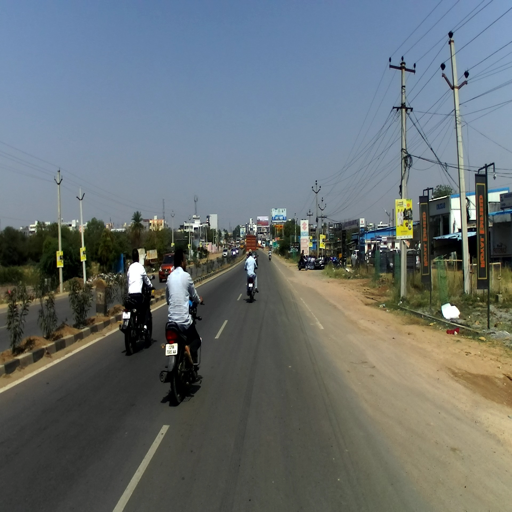

In [15]:
def denormalize_image(image, mean, std):
    """
    Denormalizes a normalized image.
    ----
    Args:
     - image (numpy.ndarray): The normalized image.
     - mean (list or numpy.ndarray): The mean used for normalization.
     - std (list or numpy.ndarray): The standard deviation used for normalization.

    """
    unnormalized_image = (image * std[:, None, None]) + mean[:, None, None]
    unnormalized_image = (unnormalized_image * 255).numpy().astype(np.uint8)
    unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
    return unnormalized_image

ade_mean = np.array(ade_mean)
ade_std = np.array(ade_std)
denormalized_image = denormalize_image(sample["pixel_values"][0], ade_mean, ade_std)
pil_image = Image.fromarray(denormalized_image)
pil_image

_Finally, we will verify the consistency between `mask_labels` and `class_labels` :_


In [16]:
labels = [id2label[label] for label in sample["class_labels"][0].tolist()]
print(labels)

['drivable fallback', 'non-drivable fallback', 'person', 'rider', 'motorcycle', 'truck', 'bus', 'vehicle fallback', 'curb', 'wall', 'fence', 'billboard', 'traffic sign', 'polegroup', 'building', 'vegetation', 'sky', 'fallback background', 'unlabeled', 'license plate']


In [17]:
def visualize_mask(sample, labels, label_name):
    print(f"Category: {label_name}")
    idx = labels.index(label_name)

    visual_mask = (sample["mask_labels"][0][idx].bool().numpy() * 255).astype(np.uint8)
    return Image.fromarray(visual_mask)

In [23]:
sample['mask_labels'][0].shape

torch.Size([18, 512, 512])

Category: drivable fallback


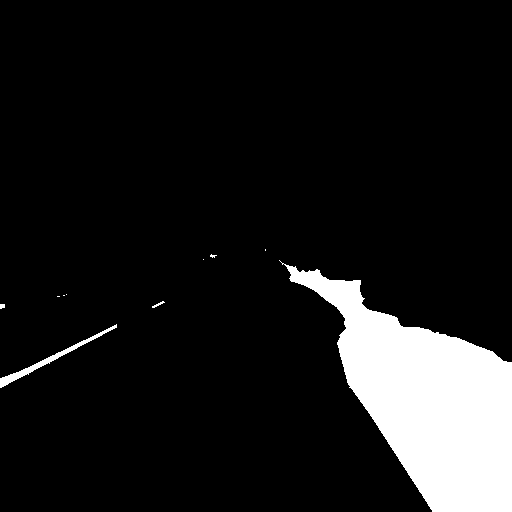

In [18]:
visualize_mask(sample, labels, labels[0])

# Loading model for semantic segmentation


### Model Choice

[Mask2Former (Cheng et al., 2022)](https://arxiv.org/pdf/2112.01527) is a versatile model designed to unify the tasks of semantic, instance, and panoptic segmentation, similar to MaskFormer, but with key enhancements that improve performance across these tasks. Mask2Former builds on the success of MaskFormer by refining the way mask predictions are made through iterative processing, leading to better segmentation quality.

Mask2Former improves segmentation by incorporating a *transformer-based pixel decoder* and leveraging *multi-scale features*, allowing the model to predict masks more accurately across different image resolutions.

The architecture of Mask2Former consists of the following components:

- **Backbone**: A pre-trained Convolutional Neural Network (CNN) or Vision Transformer (ViT) that processes the input image into a set of feature maps at multiple scales, producing rich representations for the next steps.
  
- **Pixel Decoder**: This component is enhanced compared to MaskFormer. It processes multi-scale features from the backbone and generates per-pixel embeddings for each scale, which are then combined to provide multi-level feature representations. This multi-scale pixel decoder improves the model’s ability to capture fine details and larger contextual information.

- **Transformer Decoder with Cross-Attention**: Mask2Former introduces a more sophisticated transformer decoder that performs *iterative cross-attention*. It refines a fixed set of learnable queries by iterating between image features and segment embeddings. This iterative process helps in producing more precise segment representations by refining object features step by step.

- **Multi-Scale Mask Prediction**: Mask2Former predicts segmentation masks at multiple scales, with the model learning to output fine and coarse mask predictions for each segment. This enables it to handle objects of different sizes and improves segmentation accuracy, especially for small or overlapping objects.

- **Class and Mask Prediction**: Similar to MaskFormer, the final outputs include class predictions for each segment and the corresponding binary masks. The model assigns a class label to each predicted segment, along with a unique mask for instance segmentation. Panoptic segmentation is achieved by combining the class and instance predictions, assigning both a category and a unique ID to every pixel in the image.

The iterative mask prediction mechanism, combined with multi-scale feature processing, makes Mask2Former more effective than MaskFormer in handling challenging scenarios like occlusions, small object detection, and fine-grained segmentation, offering state-of-the-art performance across semantic, instance, and panoptic segmentation tasks.

<img src="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/model_doc/mask2former_architecture.jpg" alt="Mask2Former Architecture" width="400" height="300"/>


### Semantic Segmentation

Semantic segmentation is the task of classifying each pixel in an image into a category effectively grouping parts of the image into distinct objects.


In [39]:
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-ade-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained(
    "facebook/mask2former-swin-large-ade-semantic"
)

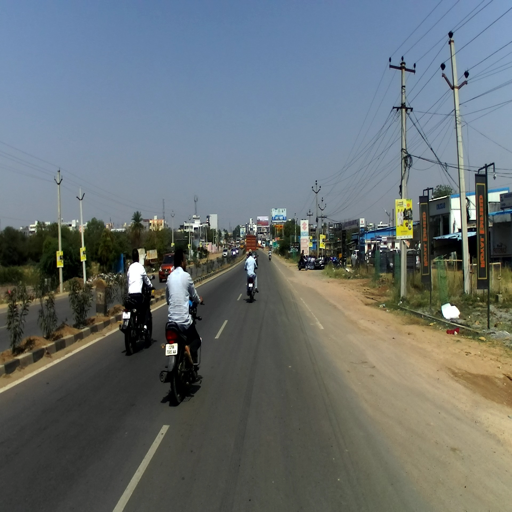

In [22]:
image = Image.fromarray(denormalized_image)
image

In [23]:
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

predicted_semantic_map = processor.post_process_semantic_segmentation(
    outputs, target_sizes=[image.size[::-1]]
)[0]
predicted_semantic_map

tensor([[2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        ...,
        [6, 6, 6,  ..., 6, 6, 6],
        [6, 6, 6,  ..., 6, 6, 6],
        [6, 6, 6,  ..., 6, 6, 6]])

In [30]:
torch.any(predicted_semantic_map == -1)

tensor(False)

In [31]:
np.unique(predicted_semantic_map)

array([  0,   1,   2,   4,   6,  11,  12,  13,  17,  20,  32,  40,  41,
        43,  66,  87,  93, 115, 116, 138])

/tmp/ipykernel_30/1229788110.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("hsv", num_classes)


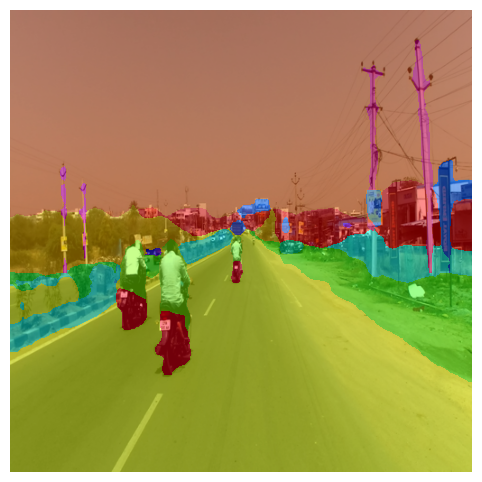

In [24]:
num_classes = len(np.unique(predicted_semantic_map))
cmap = plt.cm.get_cmap("hsv", num_classes)

overlay = np.zeros(
    (predicted_semantic_map.shape[0], predicted_semantic_map.shape[1], 4)
)

for i, unique_value in enumerate(np.unique(predicted_semantic_map)):
    overlay[predicted_semantic_map == unique_value, :3] = cmap(i)[:3]
    overlay[predicted_semantic_map == unique_value, 3] = 0.5  # 50% transparency

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image)
ax.imshow(overlay, interpolation="nearest", alpha=0.9)
plt.axis("off")

plt.show()

In [33]:
len(id2label)

40

In [34]:
sample = next(iter(train_dataloader))
sample['class_labels']

[tensor([ 2,  6,  8,  9, 11, 13, 18, 23, 27, 29, 33, 34, 35, 39]),
 tensor([ 3,  8,  9, 11, 19, 23, 24, 27, 29, 32, 33, 34, 35, 38, 39]),
 tensor([ 2,  5,  8,  9, 11, 13, 19, 20, 24, 27, 29, 32, 33, 34, 35, 39]),
 tensor([ 2,  6,  8,  9, 11, 13, 15, 18, 19, 20, 23, 27, 29, 30, 32, 33, 34, 35,
         38, 39]),
 tensor([ 2,  6,  8,  9, 11, 13, 18, 19, 23, 27, 29, 32, 33, 34, 35, 39]),
 tensor([ 2,  8,  9, 11, 13, 18, 19, 20, 23, 24, 27, 29, 32, 33, 34, 35, 38, 39]),
 tensor([ 2,  6,  8,  9, 10, 11, 13, 18, 23, 27, 29, 32, 33, 34, 35, 38]),
 tensor([ 2,  5,  6,  8,  9, 11, 14, 19, 23, 27, 29, 32, 33, 34, 35, 39])]

In [ ]:
sample = next(iter(train_dataloader))
# sample['class_labels'] = [torch.where(label == -1, torch.tensor(35), label) for label in sample['class_labels']]
outputs = model(
    pixel_values=sample["pixel_values"],
    pixel_mask=sample["pixel_mask"],
    class_labels=sample["class_labels"],
    mask_labels=sample["mask_labels"],
)
print(outputs.loss)

**Loading the Mask2Former model, now modifying the output layer with the id2label map such that the model gets finetuned for the classes in our dataset**

In [40]:
model = Mask2FormerForUniversalSegmentation.from_pretrained(
    "facebook/mask2former-swin-large-ade-semantic", id2label=id2label, ignore_mismatched_sizes=True
)

Some weights of Mask2FormerForUniversalSegmentation were not initialized from the model checkpoint at facebook/mask2former-swin-large-ade-semantic and are newly initialized because the shapes did not match:
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([41]) in the model instantiated
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([41, 256]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([41]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Training


Here, we divide our model into freezing parts, the ones that we wont finetune and the training parts that we will finetune:

**Freezing Components**: The Backbone and the Pixel Decoder will be frozen. Their pre-trained weights capture universal features applicable across different datasets and domains.

**Training Components**: The Transformer Decoder and MLP layer will be fine-tuned. This process customizes the segment embeddings and classification layers.


In [41]:
# pixel level module contains both the backbone and the pixel decoder
for param in model.model.pixel_level_module.parameters():
    param.requires_grad = False

# Confirm that the parameters are correctly frozen
for name, param in model.model.pixel_level_module.named_parameters():
    assert not param.requires_grad

In [42]:
id2label

{0: 'road',
 1: 'parking',
 2: 'drivable fallback',
 3: 'sidewalk',
 4: 'rail track',
 5: 'non-drivable fallback',
 6: 'person',
 7: 'animal',
 8: 'rider',
 9: 'motorcycle',
 10: 'bicycle',
 11: 'autorickshaw',
 12: 'car',
 13: 'truck',
 14: 'bus',
 15: 'caravan',
 16: 'trailer',
 17: 'train',
 18: 'vehicle fallback',
 19: 'curb',
 20: 'wall',
 21: 'fence',
 22: 'guard rail',
 23: 'billboard',
 24: 'traffic sign',
 25: 'traffic light',
 26: 'pole',
 27: 'polegroup',
 28: 'obs-str-bar-fallback',
 29: 'building',
 30: 'bridge',
 31: 'tunnel',
 32: 'vegetation',
 33: 'sky',
 34: 'fallback background',
 35: 'unlabeled',
 36: 'ego vehicle',
 37: 'rectification border',
 38: 'out of roi',
 39: 'license plate'}

**Below, we define the custom metrics: mean dice coefficient and mean F1 score(with beta=0.5) calculated across all the classes**</br>
**Then, we create the train and evaluate function**

In [43]:
import torch
from tqdm import tqdm
from sklearn.metrics import fbeta_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def compute_dice_f1_iou_for_classes(pred_map, gt_map, beta=0.5, num_classes=None):
    """
    Computes the Dice Coefficient, F1 score, and IoU for each class between the predicted segmentation map and the ground truth.

    Args:
    - pred_map (torch.Tensor): Predicted segmentation map of shape (H, W).
    - gt_map (torch.Tensor): Ground truth segmentation map of shape (H, W).
    - beta (float): The beta value to weigh precision more or less than recall in F1 score.
    - num_classes (int, optional): The number of classes to calculate metrics for. If None, it is inferred from the maps.

    Returns:
    - mean_dice (float): Mean Dice coefficient across classes.
    - mean_f1 (float): Mean F1 score across classes with the given beta.
    - mean_iou (float): Mean IoU across classes.
    """
    if num_classes is None:
        num_classes = max(pred_map.max().item(), gt_map.max().item()) + 1

    dice_scores = []
    f1_scores = []
    iou_scores = []

    for cls in range(num_classes):
        # Create binary masks for the current class in both pred_map and gt_map
        pred_cls_mask = (pred_map == cls).float()
        gt_cls_mask = (gt_map == cls).float()

        # Dice coefficient
        intersection = (pred_cls_mask * gt_cls_mask).sum()
        dice_coeff = (2 * intersection) / (pred_cls_mask.sum() + gt_cls_mask.sum() + 1e-8)

        # F1 score
        precision = intersection / (pred_cls_mask.sum() + 1e-8)
        recall = intersection / (gt_cls_mask.sum() + 1e-8)
        f1_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + 1e-8)

        # IoU: intersection / union
        union = pred_cls_mask.sum() + gt_cls_mask.sum() - intersection
        iou = intersection / (union + 1e-8)

        if dice_coeff.item() > 0:
            dice_scores.append(dice_coeff.item())
        if f1_score.item() > 0:
            f1_scores.append(f1_score.item())
        if iou.item() > 0:
            iou_scores.append(iou.item())

    # Mean of Dice, F1, and IoU across classes
    mean_dice = sum(dice_scores) / len(dice_scores) if dice_scores else 0.0
    mean_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0.0
    mean_iou = sum(iou_scores) / len(iou_scores) if iou_scores else 0.0

    return mean_dice, mean_f1, mean_iou


def evaluate_model(
    model: Mask2FormerForUniversalSegmentation,
    dataloader: DataLoader,
    preprocessor: AutoImageProcessor,
    id2label: dict,
    max_batches=None,
):
    """
    Evaluates the given model using the specified dataloader and computes custom metrics:
    - Mean of Dice coefficient
    - Mean of F1 score with beta=0.5
    - Mean IoU
    ----
    Args:
      - model (MaskFormerForInstanceSegmentation): The trained model to be evaluated.
      - dataloader (DataLoader): DataLoader containing the dataset for evaluation.
      - preprocessor (AutoImageProcessor): The preprocessor used for post-processing the model outputs.
      - id2label (dict): Dictionary mapping class ids to their corresponding labels.
      - max_batches (int, optional): Maximum number of batches to evaluate. If None, evaluates on the entire validation dataset.

    Returns:
    dict: The mean Dice coefficient, F1 score, and IoU calculated over the specified number of batches.
    """
    model.eval()
    running_dice = 0.0
    running_f1 = 0.0
    running_iou = 0.0
    num_batches = 0
    with torch.no_grad():
        for idx, batch in enumerate(tqdm(dataloader)):
            if max_batches and idx >= max_batches:
                break
            
            pixel_values = batch["pixel_values"].to(device)
            outputs = model(pixel_values=pixel_values)

            original_images = batch["original_images"]
            target_sizes = [
                (image.shape[0], image.shape[1]) for image in original_images
            ]

            predicted_segmentation_maps = (
                preprocessor.post_process_semantic_segmentation(
                    outputs, target_sizes=target_sizes
                )
            )

            ground_truth_segmentation_maps = batch["original_segmentation_maps"]

            # Iterate over the batch
            for pred_map, gt_map in zip(predicted_segmentation_maps, ground_truth_segmentation_maps):
                # Convert numpy arrays to torch tensors
                pred_map = torch.tensor(pred_map).to(device)
                gt_map = torch.tensor(gt_map).to(device)

                # Compute mean dice, F1, and IoU scores across all classes in the batch
                dice_coeff, f1_score, iou_score = compute_dice_f1_iou_for_classes(pred_map, gt_map, beta=0.5)

                running_dice += dice_coeff
                running_f1 += f1_score
                running_iou += iou_score
                num_batches += 1

    mean_dice = running_dice / num_batches
    mean_f1 = running_f1 / num_batches
    mean_iou = running_iou / num_batches

    return {"mean_dice": mean_dice, "mean_f1": mean_f1, "mean_iou": mean_iou}

loss_values = []
epoch_dice = []
epoch_f1 = []
epoch_iou = []

def train_model(
    model: Mask2FormerForUniversalSegmentation,
    train_dataloader: DataLoader,
    val_dataloader: DataLoader,
    preprocessor: AutoImageProcessor,
    id2label: dict,
    num_epochs=100,
    learning_rate=5e-5,
    log_interval=100,
):
    """
    Trains the Mask2Former model for semantic segmentation over a specified number of epochs and evaluates it on a validation set using custom metrics.
    ----
    Args:
      - model (MaskFormerForInstanceSegmentation): The model to be trained.
      - train_dataloader (DataLoader): DataLoader for the training data.
      - val_dataloader (DataLoader): DataLoader for the validation data.
      - preprocessor (AutoImageProcessor): The preprocessor used for preparing the data.
      - id2label (dict): Dictionary mapping class IDs to their corresponding labels.
      - num_epochs (int): Number of epochs to train the model.
      - learning_rate (float): Learning rate for the optimizer.
      - log_interval (int): Interval (in number of batches) at which to log training progress.

    """
    model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        print(f"Current epoch: {epoch+1}/{num_epochs}")
        model.train()

        running_loss = 0.0
        num_samples = 0

        for idx, batch in enumerate(tqdm(train_dataloader)):
            optimizer.zero_grad()
            batch['class_labels'] = [torch.where(label == -1, torch.tensor(35), label) for label in batch['class_labels']]
            outputs = model(
                pixel_values=batch["pixel_values"].to(device),
                mask_labels=[labels.to(device) for labels in batch["mask_labels"]],
                class_labels=[labels.to(device) for labels in batch["class_labels"]],
            )

            loss = outputs.loss
            loss.backward()

            batch_size = batch["pixel_values"].size(0)
            running_loss += loss.item()
            num_samples += batch_size

            if idx % log_interval == 0 and idx > 0:
                print(f"Iteration {idx} - loss: {running_loss/num_samples}")

            optimizer.step()

        epoch_loss = running_loss / num_samples
        loss_values.append(epoch_loss)
        
        # Evaluate using the custom metric
        val_metrics = evaluate_model(
            model, val_dataloader, preprocessor, id2label, max_batches=6
        )
        epoch_dice.append(val_metrics['mean_dice'])
        epoch_f1.append(val_metrics['mean_f1'])
        epoch_iou.append(val_metrics['mean_iou'])
        
        print(f"Validation Metrics - Mean Dice: {val_metrics['mean_dice']}, Mean F1 (β=0.5): {val_metrics['mean_f1']}, Mean IoU: {val_metrics['mean_iou']}")


In [44]:
train_model(
    model,
    train_dataloader,
    val_dataloader,
    preprocessor,
    id2label,
    num_epochs=5,
    log_interval=100,
)

Current epoch: 1/5


 75%|███████▍  | 101/135 [06:40<02:15,  3.98s/it]

Iteration 100 - loss: 11.625679809268158


  0%|          | 0/17 [00:00<?, ?it/s]/tmp/ipykernel_30/573511518.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred_map = torch.tensor(pred_map).to(device)
 35%|███▌      | 6/17 [00:24<00:44,  4.02s/it]


Validation Metrics - Mean Dice: 0.5141763518112693, Mean F1 (β=0.5): 0.4944597178961108, Mean IoU: 0.4146869299184676
Current epoch: 2/5


 75%|███████▍  | 101/135 [06:42<02:15,  3.98s/it]

Iteration 100 - loss: 9.503845701123229


 35%|███▌      | 6/17 [00:24<00:44,  4.03s/it]


Validation Metrics - Mean Dice: 0.5479287863665366, Mean F1 (β=0.5): 0.5331395592773969, Mean IoU: 0.44126949767124835
Current epoch: 3/5


 75%|███████▍  | 101/135 [06:42<02:15,  3.99s/it]

Iteration 100 - loss: 8.976816673089962


 35%|███▌      | 6/17 [00:24<00:44,  4.03s/it]


Validation Metrics - Mean Dice: 0.5493327364136908, Mean F1 (β=0.5): 0.5346366696975479, Mean IoU: 0.44248549380916774
Current epoch: 4/5


 75%|███████▍  | 101/135 [06:42<02:16,  4.01s/it]

Iteration 100 - loss: 8.673062310360447


 35%|███▌      | 6/17 [00:24<00:44,  4.02s/it]


Validation Metrics - Mean Dice: 0.5405184094310127, Mean F1 (β=0.5): 0.5296615145917817, Mean IoU: 0.4348375812221117
Current epoch: 5/5


 75%|███████▍  | 101/135 [06:43<02:15,  4.00s/it]

Iteration 100 - loss: 8.406782480749753


 35%|███▌      | 6/17 [00:24<00:44,  4.09s/it]

Validation Metrics - Mean Dice: 0.5518998819591133, Mean F1 (β=0.5): 0.5382473982712238, Mean IoU: 0.4451583042947082


**Test Evaluation**

In [45]:
test_metric = evaluate_model(model, test_dataloader, preprocessor, id2label)
print(f"Validation Metrics - Mean Dice: {test_metric['mean_dice']}, Mean F1 (β=0.5): {test_metric['mean_f1']}")

  0%|          | 0/17 [00:00<?, ?it/s]/tmp/ipykernel_30/573511518.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred_map = torch.tensor(pred_map).to(device)
100%|██████████| 17/17 [01:02<00:00,  3.69s/it]

Validation Metrics - Mean Dice: 0.5563271849290459, Mean F1 (β=0.5): 0.5411592967907606


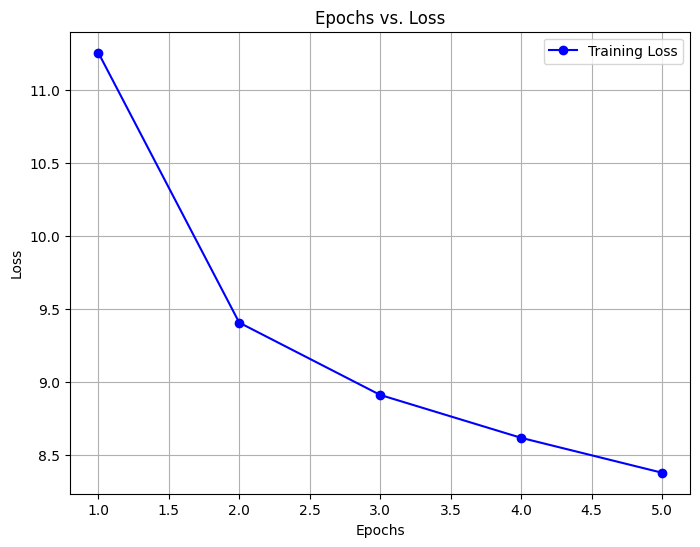

In [46]:
import matplotlib.pyplot as plt

def plot_epochs_vs_loss(loss_values):
    epochs = range(1, len(loss_values) + 1)
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss_values, marker='o', color='b', label='Training Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Epochs vs. Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_epochs_vs_loss(loss_values)

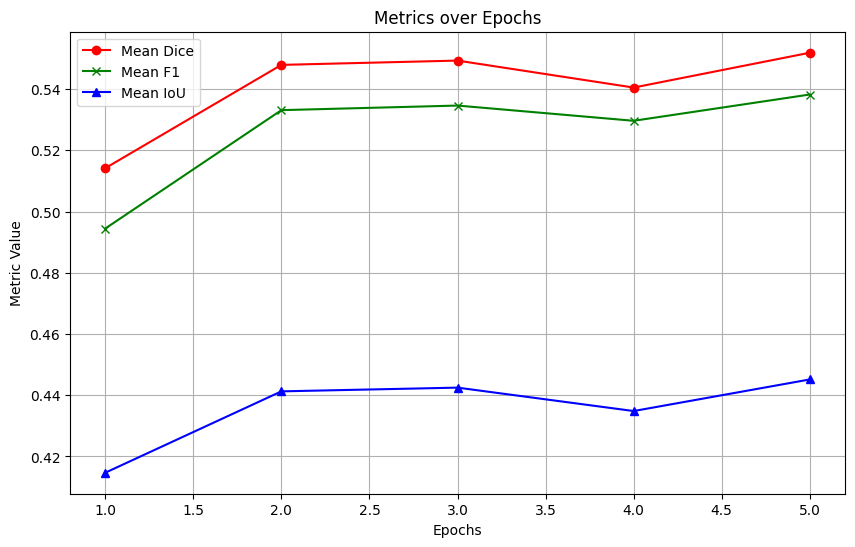

In [47]:
def plot_metrics_over_epochs(dice_values, f1_values, iou_values):
    epochs = range(1, len(dice_values) + 1)
    plt.figure(figsize=(10, 6))

    # Plot each metric
    plt.plot(epochs, dice_values, marker='o', color='r', label='Mean Dice')
    plt.plot(epochs, f1_values, marker='x', color='g', label='Mean F1')
    plt.plot(epochs, iou_values, marker='^', color='b', label='Mean IoU')

    plt.xlabel("Epochs")
    plt.ylabel("Metric Value")
    plt.title("Metrics over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metrics_over_epochs(epoch_dice, epoch_f1, epoch_iou)

In [48]:
def show_inference_samples(
    model: Mask2FormerForUniversalSegmentation,
    dataloader: DataLoader,
    preprocessor: AutoImageProcessor,
    n: int = 5,
):
    """
    Displays 'n' samples from the dataloader with model inference results.
    ----
    Args:
     - model: The trained model.
     - dataloader: DataLoader containing the dataset for inference.
     - preprocessor: The preprocessor used for post-processing the outputs.
     - n (int): Number of samples to display.

    """
    model.to(device)
    model.eval()

    if n > len(dataloader.dataset):
        raise ValueError("n is larger than the dataset size")

    fig, axs = plt.subplots(n, 2, figsize=(10, 5 * n))

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            if i >= n:
                break

            pixel_values = batch["pixel_values"].to(device)
            outputs = model(pixel_values=pixel_values)

            original_images = batch["original_images"]
            target_sizes = [
                (image.shape[0], image.shape[1]) for image in original_images
            ]
            predicted_segmentation_maps = (
                preprocessor.post_process_semantic_segmentation(
                    outputs, target_sizes=target_sizes
                )
            )

            ground_truth_segmentation_maps = batch["original_segmentation_maps"]

            image = original_images[i]
            ground_truth_map = ground_truth_segmentation_maps[i]
            predicted_map = predicted_segmentation_maps[i]

            axs[i, 0].imshow(image)
            axs[i, 0].imshow(ground_truth_map, cmap="nipy_spectral", alpha=0.5)
            axs[i, 0].set_title("Ground Truth")
            axs[i, 0].axis("off")

            axs[i, 1].imshow(image)
            axs[i, 1].imshow(
                predicted_map.cpu().numpy(), cmap="nipy_spectral", alpha=0.5
            )
            axs[i, 1].set_title("Prediction")
            axs[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

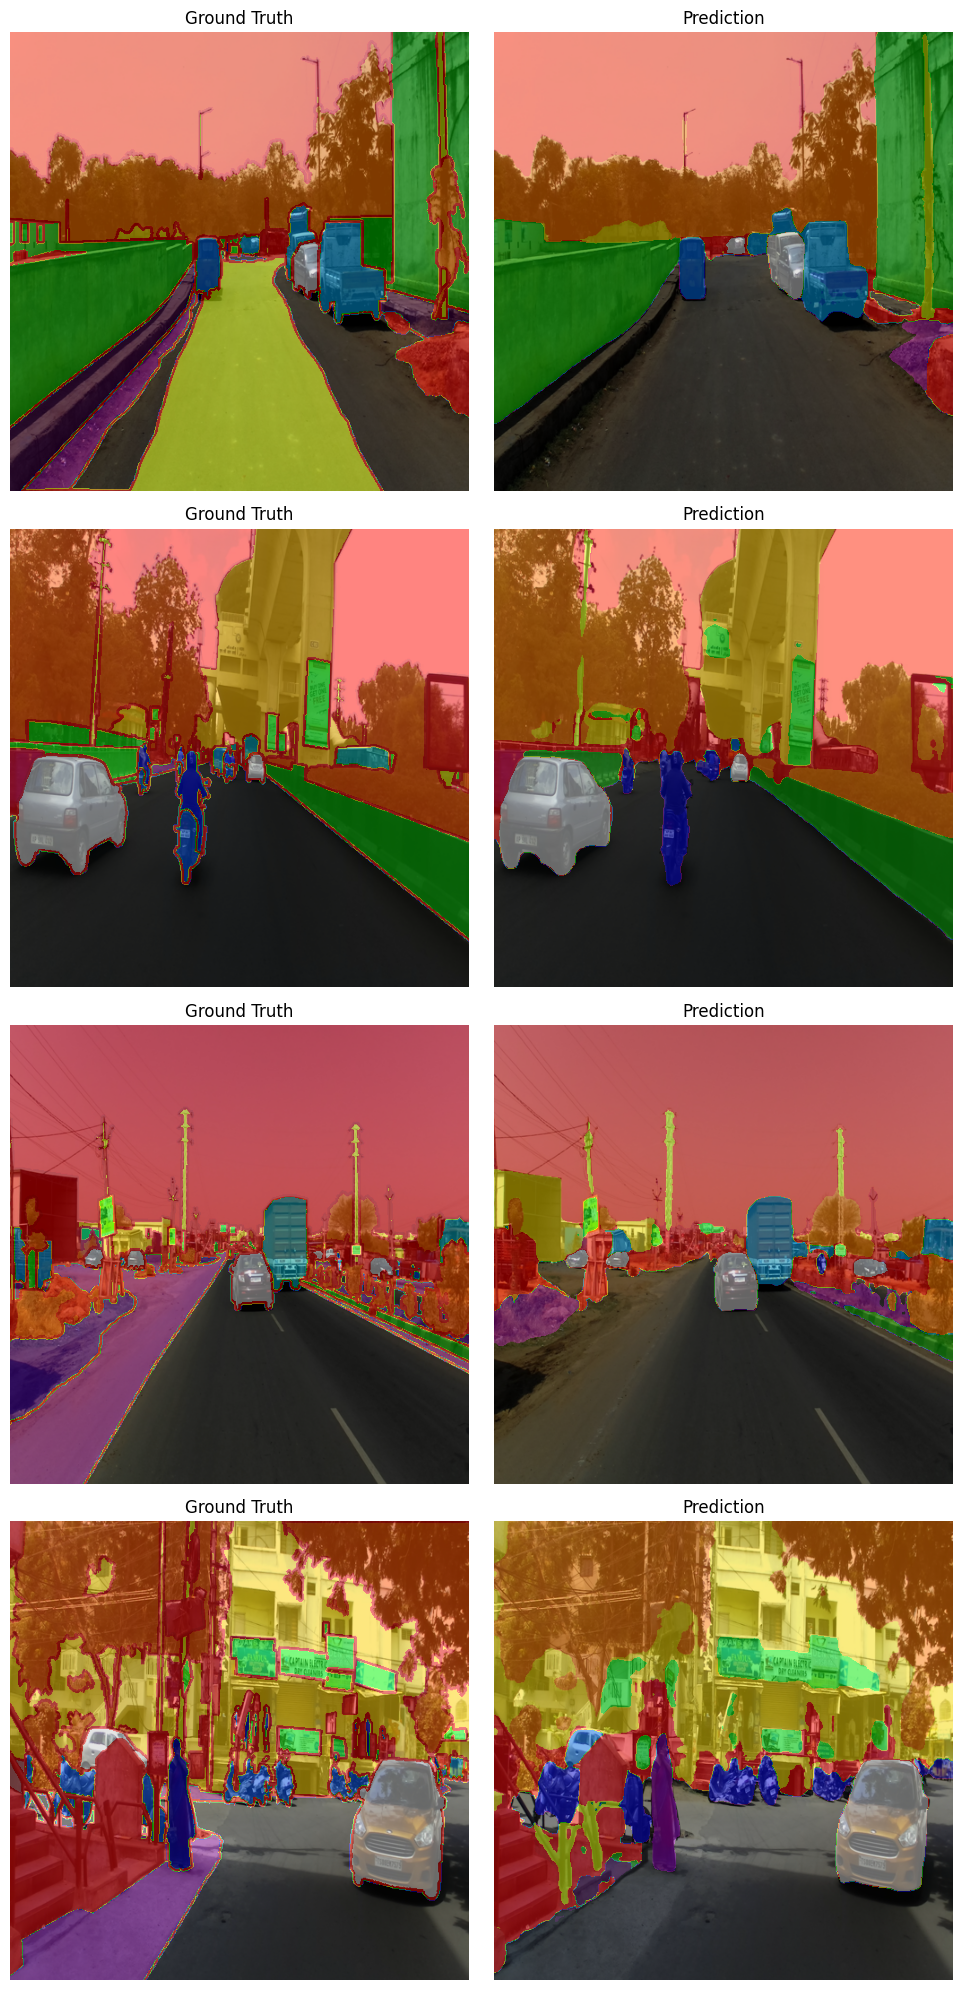

In [49]:
show_inference_samples(model, test_dataloader, preprocessor, n=4)

In [53]:
import os
os.mkdir('finetuned')

In [54]:
model.save_pretrained("finetuned")

In [55]:
!zip -r finetuned.zip finetuned/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: finetuned/ (stored 0%)
  adding: finetuned/config.json (deflated 67%)
  adding: finetuned/model.safetensors (deflated 8%)
